# Convolutional Neural Network

### Importing the libraries

In [1]:
import tensorflow as tf

In [2]:
from keras.preprocessing.image import ImageDataGenerator

In [3]:
tf.__version__

'2.4.0'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


### Preprocessing the Test set

In [5]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [6]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [8]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [10]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [11]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [12]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [13]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [18]:
from datetime import datetime
import time

In [19]:
t1 = time.time()
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)
t2 = time.time()
print('CNN running time is {:.2f}mins'.format((t2 - t1)/60))

Epoch 1/25
250/250 [==============================] - 49s 193ms/step - loss: 0.6921 - accuracy: 0.5623 - val_loss: 0.6284 - val_accuracy: 0.6800
Epoch 2/25
250/250 [==============================] - 51s 203ms/step - loss: 0.6163 - accuracy: 0.6610 - val_loss: 0.5869 - val_accuracy: 0.6845
Epoch 3/25
250/250 [==============================] - 51s 204ms/step - loss: 0.5802 - accuracy: 0.6894 - val_loss: 0.5781 - val_accuracy: 0.6895
Epoch 4/25
250/250 [==============================] - 47s 188ms/step - loss: 0.5423 - accuracy: 0.7206 - val_loss: 0.5128 - val_accuracy: 0.7630
Epoch 5/25
250/250 [==============================] - 46s 183ms/step - loss: 0.4940 - accuracy: 0.7632 - val_loss: 0.5113 - val_accuracy: 0.7580
Epoch 6/25
250/250 [==============================] - 47s 189ms/step - loss: 0.4917 - accuracy: 0.7601 - val_loss: 0.4922 - val_accuracy: 0.7725
Epoch 7/25
250/250 [==============================] - 48s 191ms/step - loss: 0.4720 - accuracy: 0.7742 - val_loss: 0.4757 - val_ac

## Part 4 - Making a single prediction

In [20]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [26]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

print(result)

if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
    
print(prediction)   

[[1.]]
dog



What is this ? 
<div>
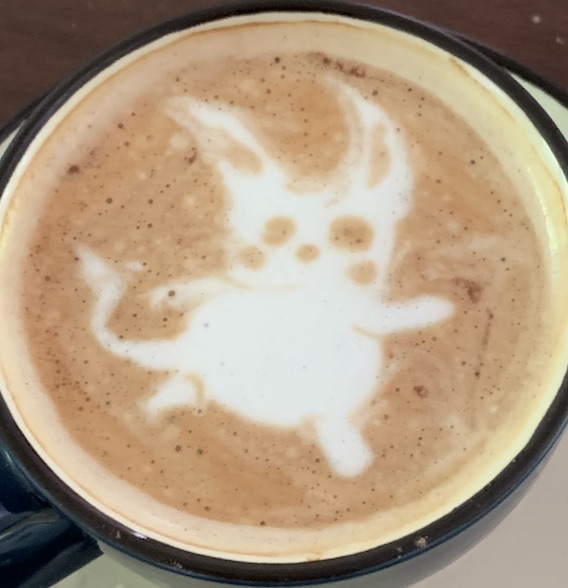
</div>



In [35]:
from keras.preprocessing import image

test_image2 = image.load_img('dataset/single_prediction/whatisit.jpg', target_size = (64, 64))
test_image2 = image.img_to_array(test_image2)
test_image2 = np.expand_dims(test_image2, axis = 0)
result2 = cnn.predict(test_image2)
print(result2)

[[1.]]
